In [2]:
import ase.io
import numpy as np
import nglview as nv
from ase.io.trajectory import Trajectory

In [3]:
import cpmd # import home-made package

In [4]:


# import gaas trajectory without wannier centers
filename="input/gaas_10ps_traj.xyz"

traj =  cpmd.read_traj.ReadCP(filename)
#nv.show_asetraj(traj.ATOMS_LIST)

In [4]:
# 
# xyz from cppp.x is suffering from rearangement of Atomic symbols
#

# symbols from xyz
print(traj.ATOMS_LIST[0].get_chemical_symbols())

# symbols to change
key_chemical_symbols=["Ga", "Ga", "Ga", "Ga", "As", "As", "As", "As"]
new_chemical_symbols=[]

# make symbols for 2*2*2 supercell
for i in range(8):
    for j in range(len(key_chemical_symbols)):
        new_chemical_symbols.append(key_chemical_symbols[j])

# change symbols in trah
for i in range(len(traj.ATOMS_LIST)):
    traj.ATOMS_LIST[i].set_chemical_symbols(new_chemical_symbols)
        

['Ga', 'Ga', 'Ga', 'Ga', 'Ga', 'Ga', 'Ga', 'Ga', 'Ga', 'Ga', 'Ga', 'Ga', 'Ga', 'Ga', 'Ga', 'Ga', 'Ga', 'Ga', 'Ga', 'Ga', 'Ga', 'Ga', 'Ga', 'Ga', 'Ga', 'Ga', 'Ga', 'Ga', 'Ga', 'Ga', 'Ga', 'Ga', 'As', 'As', 'As', 'As', 'As', 'As', 'As', 'As', 'As', 'As', 'As', 'As', 'As', 'As', 'As', 'As', 'As', 'As', 'As', 'As', 'As', 'As', 'As', 'As', 'As', 'As', 'As', 'As', 'As', 'As', 'As', 'As']


In [5]:
# ReadCP has nglview_traj method to visualize trajectory
view = traj.nglview_traj()
view

NGLWidget(count=8674)

In [6]:
# トラジェクトリの保存(in extxyz)
traj.save()

0

In [7]:
# load bec 
import numpy as np
BEC=np.loadtxt("input/borninfo_gaas")

In [8]:
# eps_infを切断
BEC=BEC[3:]
print(BEC)

[[ 2.14222  0.       0.     ]
 [ 0.       2.14222  0.     ]
 [ 0.       0.       2.14222]
 [-2.12591 -0.       0.     ]
 [-0.      -2.12591 -0.     ]
 [ 0.       0.      -2.12591]]


In [9]:
BEC1=np.array([
 [ 2.14222,  0.  ,     0.     ],
 [ 0.  ,     2.14222,  0.     ],
 [ 0.  ,     0.  ,     2.14222]
])
BEC2=-BEC1

print(BEC1)
print("")
print(BEC2)

[[2.14222 0.      0.     ]
 [0.      2.14222 0.     ]
 [0.      0.      2.14222]]

[[-2.14222 -0.      -0.     ]
 [-0.      -2.14222 -0.     ]
 [-0.      -0.      -2.14222]]


In [10]:
BEC1_super=np.tile(BEC1, (4,1))
BEC2_super=np.tile(BEC2, (4,1))
BECsum=np.concatenate([BEC1_super, BEC2_super])
print(BECsum)

# np.savetxt("BECsum.txt",BECsum)

# for conventional cell
BEC_final=np.tile(BECsum,  (8,1))
print(BEC_final)
# for 2*2*2 supercell
BEC_final2=BEC_final.reshape(64,3,3)
# print(BEC_final2)

[[ 2.14222  0.       0.     ]
 [ 0.       2.14222  0.     ]
 [ 0.       0.       2.14222]
 [ 2.14222  0.       0.     ]
 [ 0.       2.14222  0.     ]
 [ 0.       0.       2.14222]
 [ 2.14222  0.       0.     ]
 [ 0.       2.14222  0.     ]
 [ 0.       0.       2.14222]
 [ 2.14222  0.       0.     ]
 [ 0.       2.14222  0.     ]
 [ 0.       0.       2.14222]
 [-2.14222 -0.      -0.     ]
 [-0.      -2.14222 -0.     ]
 [-0.      -0.      -2.14222]
 [-2.14222 -0.      -0.     ]
 [-0.      -2.14222 -0.     ]
 [-0.      -0.      -2.14222]
 [-2.14222 -0.      -0.     ]
 [-0.      -2.14222 -0.     ]
 [-0.      -0.      -2.14222]
 [-2.14222 -0.      -0.     ]
 [-0.      -2.14222 -0.     ]
 [-0.      -0.      -2.14222]]
[[ 2.14222  0.       0.     ]
 [ 0.       2.14222  0.     ]
 [ 0.       0.       2.14222]
 [ 2.14222  0.       0.     ]
 [ 0.       2.14222  0.     ]
 [ 0.       0.       2.14222]
 [ 2.14222  0.       0.     ]
 [ 0.       2.14222  0.     ]
 [ 0.       0.       2.14222]
 [ 2.1422

In [11]:
# set bec
traj.set_bec(bec=BEC_final2)

#print(np.shape(BEC_final2))
#print(traj.nstep)
#print(len(traj.ATOMS_LIST[0].get_chemical_symbols()))
# calculate dipole
dipole_array=traj.calc_dipole()


In [13]:
# debug
np.shape(dipole_array)

(8674, 3)

In [1]:
start=1000
import matplotlib.pyplot as plt
x=np.arange(np.shape(dipole_array)[0]-start)
plot_dipole_array=dipole_array[start:,:]-dipole_array[start,:]

NameError: name 'np' is not defined

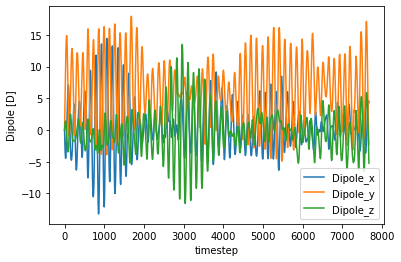

In [15]:
plt.plot(x,plot_dipole_array[:,0],label="Dipole_x")
plt.plot(x,plot_dipole_array[:,1],label="Dipole_y")
plt.plot(x,plot_dipole_array[:,2],label="Dipole_z")
plt.xlabel("timestep")
plt.ylabel("Dipole [D]")
plt.legend()

In [13]:
# ase.units.Debye

1/ase.units._c*1e-21
#1/ase.units.Debye #3.33564e-30

3.33564095198152e-30

In [17]:
np.save("plot_dipole_array", plot_dipole_array)

In [18]:
plot_dipole_array=np.load("plot_dipole_array.npy")

In [19]:
import statsmodels.api as sm 
import numpy as np
eps0 = 8.8541878128e-12
debye = 3.33564e-30
nm3 = 1.0e-27
nm = 1.0e-9
A3 = 1.0e-30
kb = 1.38064852e-23
T =300 

# time =ms["time"].to_numpy()
V=   11.1923*11.1923*11.1923 * A3
kbT = kb * T 

# N = int(len(ms))

#acf_x = np.zeros(time.shape)
#acf_y = np.zeros(time.shape)
#acf_z = np.zeros(time.shape)
#eps_0 = 0

N=int(np.shape(plot_dipole_array)[0]/2)
print(N)

dMx=plot_dipole_array[:,0]
dMy=plot_dipole_array[:,1]
dMz=plot_dipole_array[:,2]


eps_0 = 1.0 + ((np.mean(dMx**2+dMy**2+dMz**2))*debye**2)/(3.0*V*kbT*eps0)

#自己相関関数を求める
acf_x = sm.tsa.stattools.acf(dMx,nlags=N,fft=False)
acf_y = sm.tsa.stattools.acf(dMy,nlags=N,fft=False)
acf_z = sm.tsa.stattools.acf(dMz,nlags=N,fft=False)
    

3837


In [20]:
np.shape(plot_dipole_array)

(7674, 3)

In [21]:
print(dMx)

print(np.shape(acf_z))

[ 0.         -0.28273532 -0.56006984 ...  4.42925124  4.37168311
  4.30599756]
(3838,)


In [22]:
print(0.024189*5)

0.120945


In [23]:
# timestepをpsで計算する．
time=np.arange(int(np.shape(plot_dipole_array)[0]/2)+1)*0.024189*5*10/1000
print(len(time))

print(time)

3838
[0.00000000e+00 1.20945000e-03 2.41890000e-03 ... 4.63824075e+00
 4.63945020e+00 4.64065965e+00]


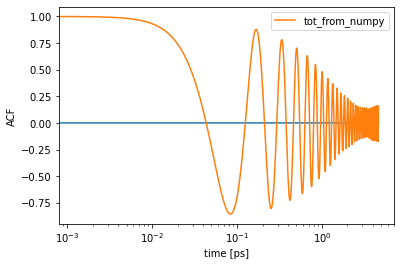

In [24]:
import matplotlib.pyplot as plt
plt.plot(time[:],np.zeros(time[:].shape))
input_data =(acf_x+acf_y+acf_z)/3
plt.plot(time[:],input_data,label="tot_from_numpy")
#sigma=1
#blur_array = gaussian_filter((acf_x+acf_y+acf_z)/3, sigma)
#plt.plot(time[:],blur_array,label="Blur")
plt.legend()
plt.xlabel("time [ps]")
plt.ylabel("ACF")
plt.xscale("log")
plt.show()

In [25]:
#天野さんコード(numpy)

from calc_fourier import calc_fourier

eps_n2 = 1.333**2
eps_n2 = 10**2
eps_inf = 1.0
#eps_0 = pred_eps
#data=acfs["acf"].to_numpy()
fft_data =(acf_x+acf_y+acf_z)/3
#data[0]=0.5
#data =blur_array

TIMESTEP =(time[1]-time[0])  # psec.

rfreq, ffteps1, ffteps2=calc_fourier(fft_data,eps_0, eps_n2,TIMESTEP)

kayser = rfreq * 33.3 

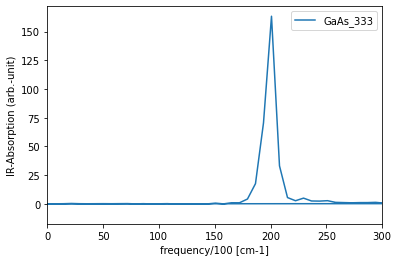

In [26]:

plt.plot(kayser, ffteps2, label="GaAs_333")
plt.legend()
plt.xlabel("frequency/100 [cm-1]")
#plt.xlabel("frequency [THz]")
plt.ylabel("IR-Absorption (arb.-unit)")
plt.xlim(0,300)
#plt.ylim(0,10)
#plt.xscale('log')
#plt.yscale('log')
plt.show()